/home/everysens-m15/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:04:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/home/everysens-m15/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:04:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


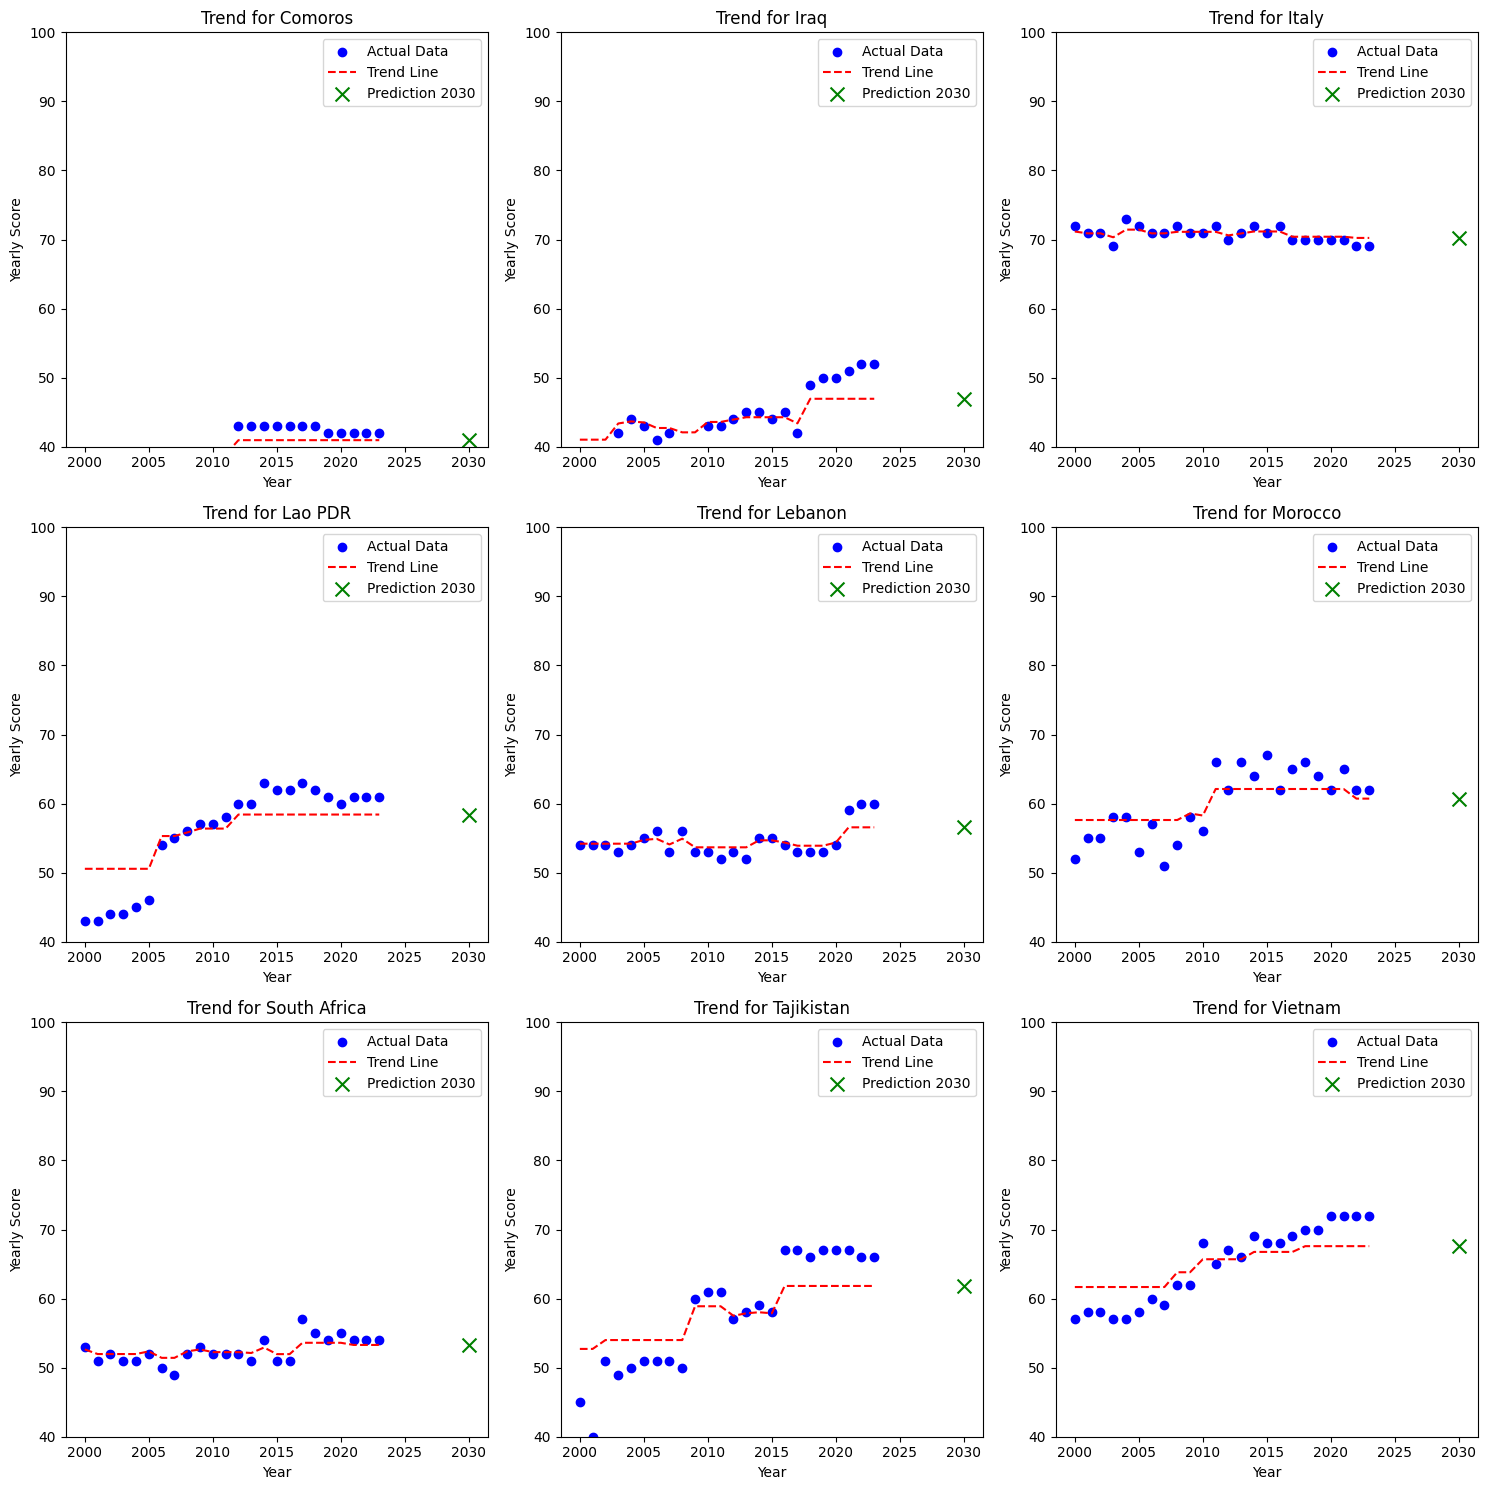

   Country  Year  Predicted Yearly Score
0  Comoros  2030               40.949455
1     Iraq  2030               46.941769
2    Italy  2030               70.231674
3  Lao PDR  2030               58.414143
4  Lebanon  2030               56.563435


In [10]:
from xgboost.sklearn import XGBRegressor
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/data.csv")
df.drop('id', axis=1, inplace=True)
df[df["Country"] == "Brazil"].groupby("Country")
predictions = []
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
selected_countries = df['Country'].drop_duplicates().sample(min(9, df['Country'].nunique()))
filtered_df = df[df['Country'].isin(selected_countries)]

plot_idx = 0  # Track valid plot indices

for country, data in filtered_df.groupby("Country"):
    X = data["year"].values.reshape(-1, 1)
    y = data["goal2"].values
    if len(X) < 2:
        continue

    model = XGBRegressor(objective ='reg:linear', n_estimators = 2, seed = 123) #XGBRegressor()
    model.fit(X, y)
    
    # Predict for 2030
    y_pred_2030 = model.predict([[2030]])[0]
    predictions.append({"Country": country, "Year": 2030, "Predicted Yearly Score": y_pred_2030})
    
    # Plot trends for selected countries
    if country in selected_countries.values and plot_idx < len(axes):
        ax = axes[plot_idx]
        plot_idx += 1  # Increment only for valid plots
        # predict X from 2000 to 2030
        y_pred = model.predict(X)
        ax.scatter(X, y, color='blue', label='Actual Data')
        ax.plot(X, y_pred, color='red', linestyle='dashed', label='Trend Line')
        ax.scatter([2030], [y_pred_2030], color='green', marker='x', s=100, label='Prediction 2030')
        ax.set_xlabel('Year')
        ax.set_ylabel('Yearly Score')
        ax.set_title(f'Trend for {country}')
        ax.set_ylim(40,100)
        ax.legend()

plt.tight_layout()
plt.show()

# Convert results to DataFrame
pred_df = pd.DataFrame(predictions)
print(pred_df.head())